# 相关包的导入

- networkx 官方文档: https://networkx.github.io/documentation/stable/

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# networkx四种网络模型生成方法

1. **规则图：**通过指定网络的节点数量与节点的度来生成随机网络；
2. **ER随机图：**按照指定的概率生成网络中的每一条边；
3. **WS网络图：**从规则的网络出发，以一定的概率将网络中的连接打乱重连；
4. **BA无标度图：**向一个较小的网络逐步加入新的节点，每个新节点与现有节点生成固定数量的边，新节点优先考虑与度数高的节点产生连接

## 生成规则图

`
nx.random_graphs.random_regular_graph(d, n, seed=None)
` 

**Parameters:** 
- d : 生成的规则图中每个节点的度
- n : 生成的规则图中的节点数量
- seed : 随机种子

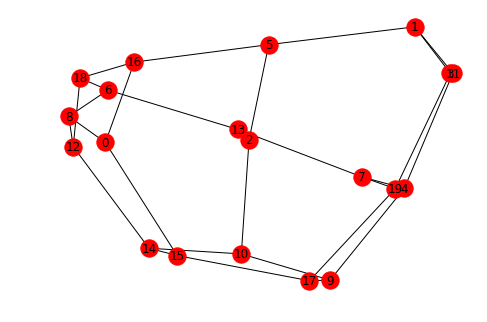

In [2]:
# 规则图
# 生成一个有20个节点的规则图，每个节点有3个邻居节点。
RG = nx.random_graphs.random_regular_graph(3, 20)

# 布局，采用spectral布局
pos1 = nx.spectral_layout(RG)
pos2 = nx.shell_layout(RG)
pos3 = nx.circular_layout(RG)
pos4 = nx.spring_layout(RG)

# 绘图
nx.draw(RG, pos1, with_labels=True)
plt.show()

## 生成ER随机图

`
nx.random_graphs.erdos_renyi_graph(n, p, seed=None, directed=False)
` 

**Parameters:** 
- n : 生成的ER随机图中的节点数量
- p : 图中每一条边建立的概率
- seed : 随机种子
- directed : 是否生成有向图

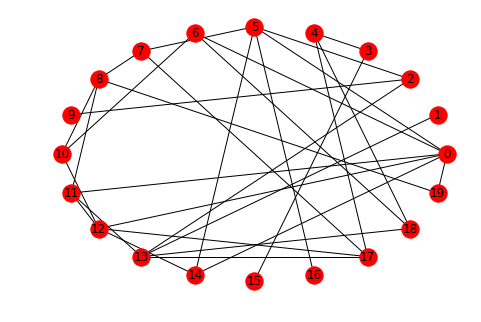

In [3]:
# ER随机图
# 生成一个有n=20个节点的图，每一对节点之间的连接概率为p=0.2。
ER = nx.random_graphs.erdos_renyi_graph(20, 0.2, directed=False)

# 采用shell布局，在同心圆上分布节点
pos2 = nx.shell_layout(ER)
nx.draw(ER, pos2, with_labels=True)
plt.show()

## 生成WS小世界网络

`
nx.random_graphs.watts_strogatz_graph(n, k, p, seed=None)
` 

**Parameters:** 
- n : 生成的WS小世界网络中的节点数量
- k : 每个节点以环形拓扑与其k个最近的邻居相连
- p : 每一条边随机重连的概率
- seed : 随机种子

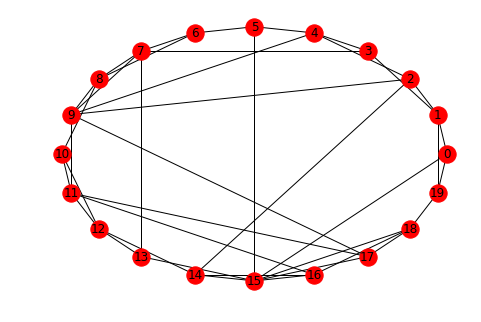

In [4]:
# WS小世界网络
# 生成一个有n=20个节点的WS小世界网络
# 每个节点有4个邻居节点
# 随机化重连概率为0.3
WS = nx.random_graphs.watts_strogatz_graph(20, 4, 0.3)

# circular布局，在圆上随机分布节点
pos3 = nx.circular_layout(WS)
nx.draw(WS, pos3, with_labels=True)
plt.show()

## 生成BA无标度网络

`
nx.random_graphs.barabasi_albert_graph(n, m, seed=None)
`

**Parameters:** 
- n : 生成的BA无标度网络中的节点数量
- m : 新节点到现有节点的边数量
- seed : 随机种子

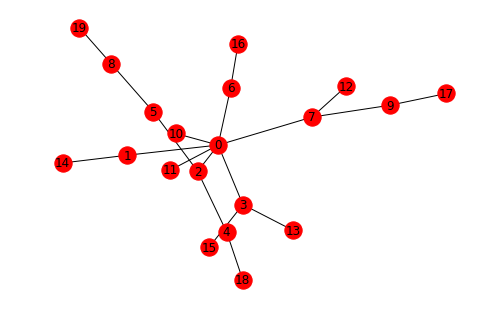

In [5]:
# BA无标度网络
# 生成一个有n=20个节点，每次加入m=1条边的BA无标度网络
BA = nx.random_graphs.barabasi_albert_graph(20, 1)

# spring布局，使用Fruchterman-Reingold力导向算法定位节点
pos4 = nx.spring_layout(BA)
nx.draw(BA, pos4, with_labels=True)
plt.show()

# 图网络可视化

`
nx.draw(G, pos，node_color, edge_color, with_labels, font_size, node_size)
`

**布局（layout）：**
    1. 在单位正方形中随机均匀分布节点: nx.random_layout(G)
    2. 在圆上随机分布节点: nx.circular_layout(G)
    3. 在两条直线上分布节点: nx.bipartite_layout(G)
    4. 使用图拉普拉斯算子的特征向量来定位节点: nx.spectral_layout(G)
    5. 在同心圆中分布节点: nx.shell_layout(G)
    6. 使用Fruchterman-Reingold力导向算法定位节点: nx.spring_layout(G)

`
nx.draw_networkx_nodes()
`

**Parameters:**
- G: networkx图
- pos: 布局
- nodelist=None: 绘制指定节点（默认绘制全部节点G.nodes( )）
- node_size=300: 节点大小
- node_color='r': 节点颜色
- node_shape='o': 节点形状 ('so^>v<dph8’)
- alpha=1.0: 节点透明度
- cmap=None: 用于映射节点强度的色彩映射
- vmin=None: 节点色彩映射缩放的最小值
- vmax=None: 节点色彩映射缩放的最大值
- ax=None: 在指定的Matplotlib轴中绘制图形
- linewidths=None: 节点边框的线宽
- label=None: 图例标签
- \**kwds

`
nx.draw_networkx_edges()
`

**Parameters:**
- G: networkx图
- pos: 布局
- edgelist=None: 绘制指定的边（默认绘制全部边G.edges( )）
- width=1.0: 边的线宽
- edge_color='k': 边颜色
- style='solid': 边样式
- alpha=1.0: 边透明度
- edge_cmap=None: 用于映射边强度的色彩映射
- edge_vmin=None: 节点色彩映射缩放的最小值
- edge_vmax=None: 节点色彩映射缩放的最大值
- ax=None: 在指定的Matplotlib轴中绘制图形
- arrows=True: 对于有向图，若为True，则绘制箭头
- label=None: 图例标签
- \**kwds

## 简单绘图实例

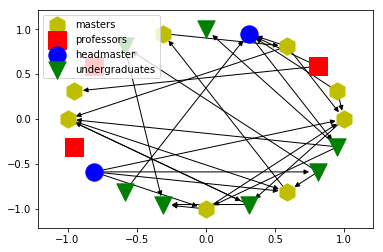

In [6]:
# ER随机图
ER = nx.random_graphs.erdos_renyi_graph(20, 0.1, directed=True)

yellow_nodes = [0, 1, 9, 3, 10, 15, 6, 17]
red_nodes = [8, 2, 11]
blue_nodes = [4, 12]
green_nodes = [13, 14, 5, 16, 7, 18, 19]

pos = nx.shell_layout(ER)

nx.draw_networkx_nodes(ER, pos, nodelist=yellow_nodes, node_color='y', node_shape='h', label='masters')
nx.draw_networkx_nodes(ER, pos, nodelist=red_nodes, node_color='r', node_shape='s', label='professors')
nx.draw_networkx_nodes(ER, pos, nodelist=blue_nodes, node_color='b', node_shape='o', label='headmaster')
nx.draw_networkx_nodes(ER, pos, nodelist=green_nodes, node_color='g', node_shape='v', label='undergraduates')

nx.draw_networkx_edges(ER, pos)

plt.legend()
plt.show()

**networkx 官方绘图实例:** <br>
https://networkx.github.io/documentation/stable/auto_examples/index.html#drawing

## ego-network 自我中心网络

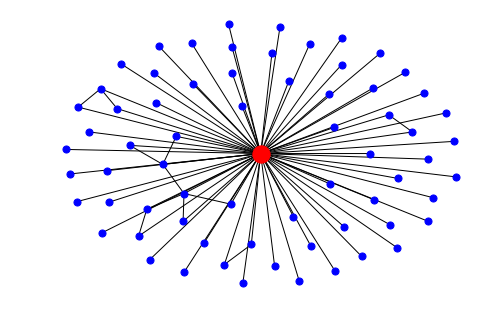

In [7]:
from operator import itemgetter

# Create a BA model graph
n = 1000
m = 2
G = nx.generators.barabasi_albert_graph(n, m)

# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

## 权重网络

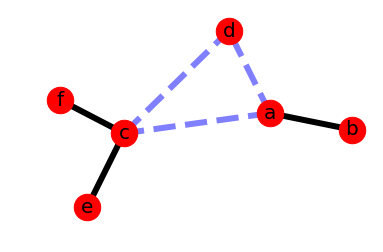

In [8]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

## 度数直方图

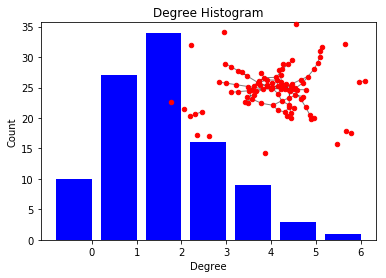

In [9]:
import collections

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# 最大连通图

`
nx.connected_components(G)
`

**Parameters:**
- G: networkx图

**Return:** 一个节点集合的生成器，每个集合对应图G的一个部分

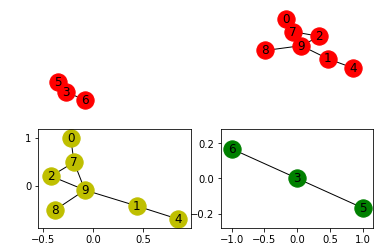

In [10]:
# 产生一个随机网络
G = nx.gnp_random_graph(10, 0.2, seed=5)

# 设置布局
pos = nx.spring_layout(G)

# 设置Matplotlib绘制的子图格式
# 首先绘制整体图G
plt.subplot(211)
nx.draw(G, pos, with_labels=True)

# 分别绘制G的两个部分
color =['y','g']
subplot = [223,224]

for c in nx.connected_components(G):
       # 得到不连通的子集
        nodeSet = G.subgraph(c).nodes()
       # 绘制子图
        subgraph = G.subgraph(c)
        plt.subplot(subplot[0])
        nx.draw_networkx(subgraph, with_labels=True, node_color=color[0])
        color.pop(0)
        subplot.pop(0)

In [11]:
# 对图G的各个连通部分按大小降序排列
n = 1
for c in sorted(nx.connected_components(G), key=len, reverse=True):
    print('component {}: {}, nodes num: {}'.format(n, c, len(c)))
    n += 1

# 获得图G的最大连通部分
largest_components = max(nx.connected_components(G), key=len)
print('largest components of G: {}'.format(largest_components))

component 1: {0, 1, 2, 4, 7, 8, 9}, nodes num: 7
component 2: {3, 5, 6}, nodes num: 3
largest components of G: {0, 1, 2, 4, 7, 8, 9}


对图进行分析——e.g. 强联通&弱联通，参考网址: <br \>
https://www.cnblogs.com/wushaogui/p/9204797.html#8%E5%AF%B9%E5%9B%BE%E8%BF%9B%E8%A1%8C%E5%88%86%E6%9E%90